<a href="https://colab.research.google.com/github/R-Owino/HOUSE-PRICE-PREDICTION/blob/main/Moringa_Data_Science_Core_W7_Independent_Project_2022_04_Rehema_Owino.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Defining the Question

### a) Specifying the Question
Study the factors that affect housing prices using the given information on real estate properties and create a model that allows sale price prediction given predictor variables.

### b) Defining the Metric for Success
Build different models using various techniques and choosing the best model based on the accuracy.

### c) Understanding the context 
House price is dependent on several factors such as the number of bedrooms, the number of bathrooms, the number of floors, whether waterfront is there or not, 
the year the house was built, the year the house was renovated and the place the house is located, just to name a few. building a model that correctly predicts house prices for sale would be of utmost importance to the company, given the factors. 


### d) Recording the Experimental Design
- Load the dataset
- Clean the data
- Perform EDA
- Build a model using linear regression technique
- Challenge the linear regression model by using other techniques to perform prediction
- Choose the most suitable technique for prediction

## 2. Reading the Data

In [ ]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Lasso,Ridge, ElasticNet
from sklearn.model_selection import KFold,GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

print('All libraries are imported')

All libraries are imported


In [ ]:
# Loading the Dataset
url = 'http://bit.ly/IndependentProjectWeek7Dataset'
df = pd.read_csv(url) 

## 3. Checking the Data

In [ ]:
# Determining the no. of records in our dataset
print('There are ' +str(df.shape[0])+ ' rows and ' +str(df.shape[1])+ ' columns in the dataset')

There are 21613 rows and 20 columns in the dataset


In [ ]:
# Previewing the top of our dataset
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
# Previewing the bottom of our dataset
df.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [ ]:
# Checking whether each column has an appropriate datatype
df.dtypes

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

Column description:
- Id 
- price  - Price of the house
- bedrooms - Number of Bedrooms
- bathrooms - Number of Bathrooms
- sqft_living - Square feet area of living area
- sqft_lot  - Square feet area of parking Layout
- floors - Number of Floors
- waterfront - Whether waterfront is there or not
- view - Number of Views
- condition - condition of the house
- grade - Grades
- sqft_above
- sqft_basement - Square feet area of basement
- yr_built - Year the house is built
- yr_renovated - Year the house is renovated
- zipcode - zipcode os the house
- lat : Latitude of the house
- lon : Longitude of the house
- sqft_living15
- sqft_lot15

## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

### a.Validation

For validation, I will use a dataset containing zip codes in United States to check against the zip codes in our dataset.

In [ ]:
zip = pd.read_csv('/content/zip_code_database.csv')
zip.tail(3)


,zip,type,decommissioned,primary_city,acceptable_cities,unacceptable_cities,state,county,timezone,area_codes,world_region,country,latitude,longitude,irs_estimated_population
42721,99928,PO BOX,0,Ward Cove,NaN,NaN,AK,Ketchikan Gateway Borough,America/Sitka,907,NaN,US,55.45,-131.79,1530
42722,99929,PO BOX,0,Wrangell,NaN,NaN,AK,Wrangell City and Borough,America/Sitka,907,NaN,US,56.41,-131.61,2145
42723,99950,PO BOX,0,Ketchikan,"Edna Bay, Kasaan",NaN,AK,Prince of Wales-Outer Ketchikan Borough,America/Sitka,907,NaN,US,55.34,-131.64,262


In [ ]:
# validation 
df['zipcode'].isin(zip['zip']).value_counts()

True    21613
Name: zipcode, dtype: int64

All the zip codes in our dataset are in the zip code database, hence validation checked.

## 5. Tidying the Dataset

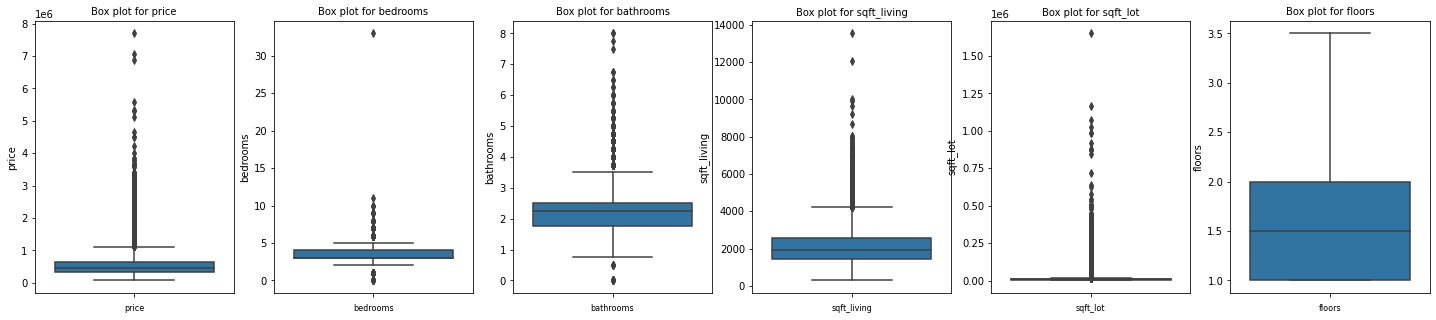

In [ ]:
# Checking for Outliers
cols = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors']

def box(columns):
  fig, ax = plt.subplots(ncols = len(columns), figsize=(25,5))

  for i, col_val in enumerate(columns):
      sns.boxplot(y = df[col_val], ax= ax[i])
      ax[i].set_title('Box plot for {}'.format(col_val), fontsize=10)
      ax[i].set_xlabel(col_val, fontsize= 8)
  return plt.show()    


box(cols)

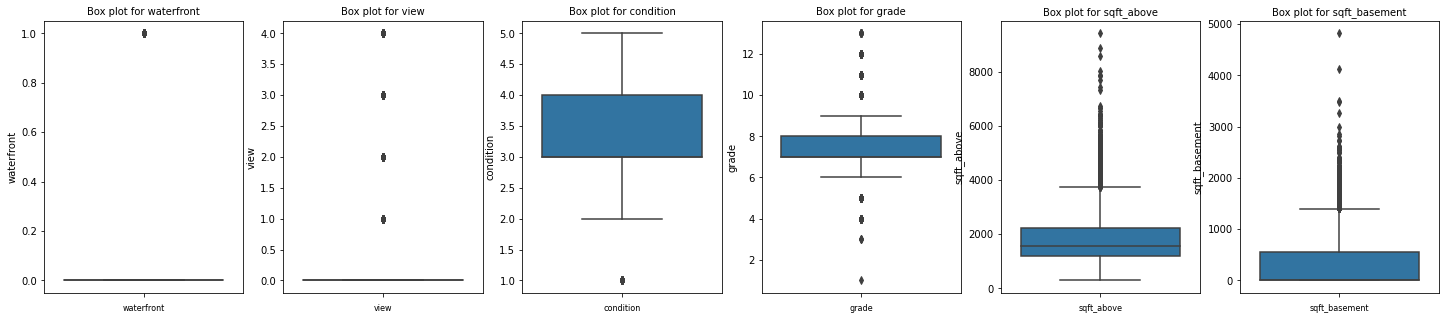

In [ ]:
cols = ['waterfront', 'view',	'condition',	'grade', 'sqft_above', 'sqft_basement']
box(cols)

In [ ]:
# Checking for Anomalies
col_names = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
             'waterfront', 'view',	'condition',	'grade', 'sqft_above', 'sqft_basement']
             
def quantiles(columns):
  for column in columns:
      Q1 = df[column].quantile(0.25)
      Q3 = df[column].quantile(0.75)
      IQR = Q3 - Q1
      lb = Q1 - (1.5 * IQR)
      ub = Q3 + (1.5 * IQR)
      print(f'{column} : \nQ1 = {Q1},Q3 = {Q3}, IQR = {IQR}, lowerbound = {lb}, upperbound = {ub}')

quantiles(col_names)

price : 
Q1 = 321950.0,Q3 = 645000.0, IQR = 323050.0, lowerbound = -162625.0, upperbound = 1129575.0
bedrooms : 
Q1 = 3.0,Q3 = 4.0, IQR = 1.0, lowerbound = 1.5, upperbound = 5.5
bathrooms : 
Q1 = 1.75,Q3 = 2.5, IQR = 0.75, lowerbound = 0.625, upperbound = 3.625
sqft_living : 
Q1 = 1427.0,Q3 = 2550.0, IQR = 1123.0, lowerbound = -257.5, upperbound = 4234.5
sqft_lot : 
Q1 = 5040.0,Q3 = 10688.0, IQR = 5648.0, lowerbound = -3432.0, upperbound = 19160.0
floors : 
Q1 = 1.0,Q3 = 2.0, IQR = 1.0, lowerbound = -0.5, upperbound = 3.5
waterfront : 
Q1 = 0.0,Q3 = 0.0, IQR = 0.0, lowerbound = 0.0, upperbound = 0.0
view : 
Q1 = 0.0,Q3 = 0.0, IQR = 0.0, lowerbound = 0.0, upperbound = 0.0
condition : 
Q1 = 3.0,Q3 = 4.0, IQR = 1.0, lowerbound = 1.5, upperbound = 5.5
grade : 
Q1 = 7.0,Q3 = 8.0, IQR = 1.0, lowerbound = 5.5, upperbound = 9.5
sqft_above : 
Q1 = 1190.0,Q3 = 2210.0, IQR = 1020.0, lowerbound = -340.0, upperbound = 3740.0
sqft_basement : 
Q1 = 0.0,Q3 = 560.0, IQR = 560.0, lowerbound = -840.0, up

In [ ]:
# Identifying the Missing Data
print('Sum of missing values is: ', df.isnull().sum().sum())

Sum of missing values is:  0


In [ ]:
# More data cleaning procedures

# Check for duplicates
print('Sum of duplicates: ', df.duplicated().sum())

duplicate = df[df.duplicated()] 
print('Duplicate Rows :') 
duplicate

# the duplicates are not from the same id, I will not drop them

Sum of duplicates:  3
Duplicate Rows :


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3951,1825069031,550000.0,4,1.75,2410,8447,2.0,0,3,4,8,2060,350,1936,1980,98074,47.6499,-122.088,2520,14789
14983,6308000010,585000.0,3,2.50,2290,5089,2.0,0,0,3,9,2290,0,2001,0,98006,47.5443,-122.172,2290,7984
20054,8648900110,555000.0,3,2.50,1940,3211,2.0,0,0,3,8,1940,0,2009,0,98027,47.5644,-122.093,1880,3078


In [ ]:
# drop irrelevant columns
df.drop(['id', 'sqft_living15', 'sqft_lot15'], axis = 1, inplace = True)
df.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319


## 6. Exploratory Analysis

###Univariate

In [ ]:
# statistics description
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896
std,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000


In [ ]:
# Function for count for various factors using a bar chart

def plotbar(column, figsize):
  plt.figure(figsize = figsize)
  df[column].value_counts().plot.bar()
  plt.title('Bar chart representation for {}'.format(column))
  plt.xlabel(column)
  plt.ylabel('Count')
  return plt.show()

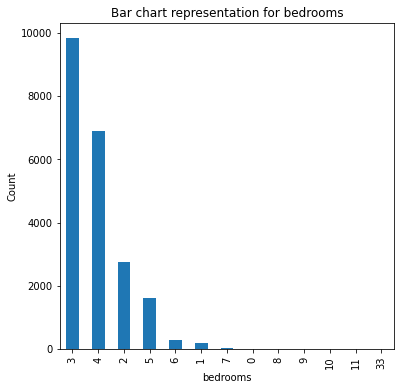

In [ ]:
#Barchart for bedrooms
plotbar('bedrooms', (6,6))

# most houses have 3 bedrooms

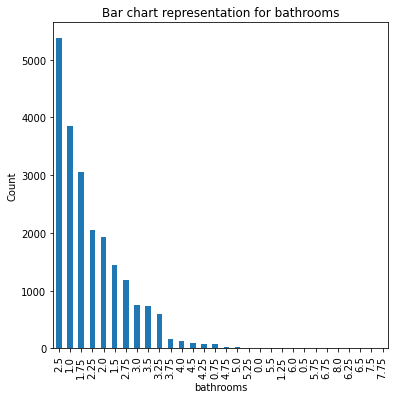

In [ ]:
#Barchart for bathrooms
plotbar('bathrooms', (6,6))

# most houses have 2.5 bathrooms 

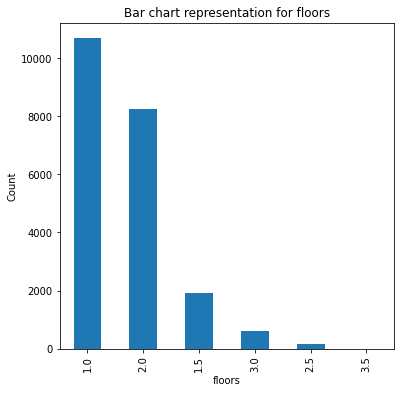

In [ ]:
#Barchart for floors 
plotbar('floors', (6,6))

# most houses have one floor

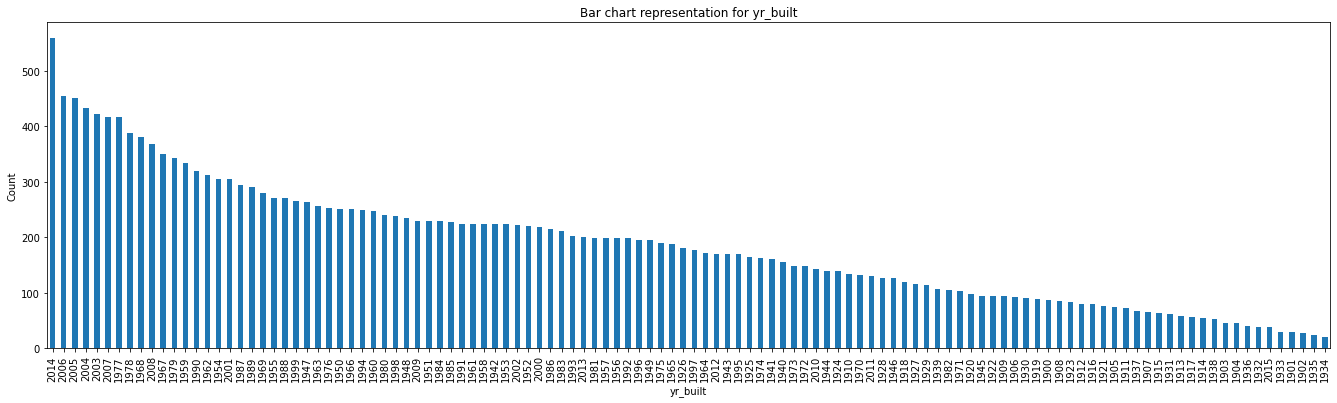

In [ ]:
#Barchart for year built
plotbar('yr_built', (23,6))

# most houses were built in 2014

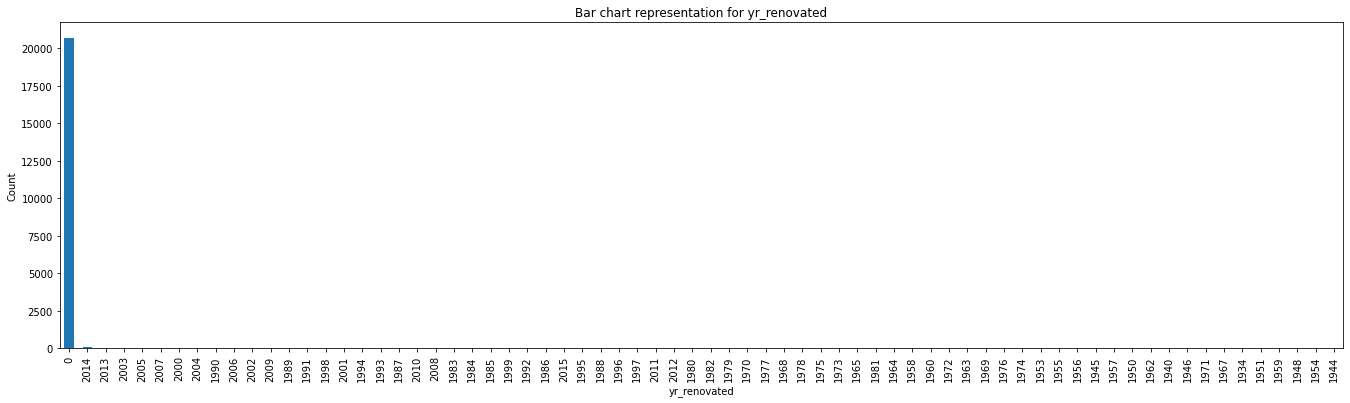

In [ ]:
#Barchart for year renovated
plotbar('yr_renovated', (23,6))

# most houses have not been renovated

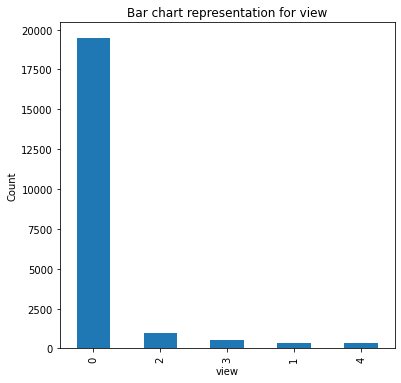

In [ ]:
#Barchart for view
plotbar('view', (6,6))

# most houses have 0 views 

###Bivariate

In [ ]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
price,1.000000,0.308338,0.525134,0.702044,0.089655,0.256786,0.266331,0.397346,0.036392,0.667463,0.605566,0.323837,0.053982,0.126442,-0.053168,0.306919,0.021571
bedrooms,0.308338,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473
bathrooms,0.525134,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042
sqft_living,0.702044,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223
sqft_lot,0.089655,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521
floors,0.256786,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419
waterfront,0.266331,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910
view,0.397346,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400
condition,0.036392,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500
grade,0.667463,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372


Scatter plots for price against various factors

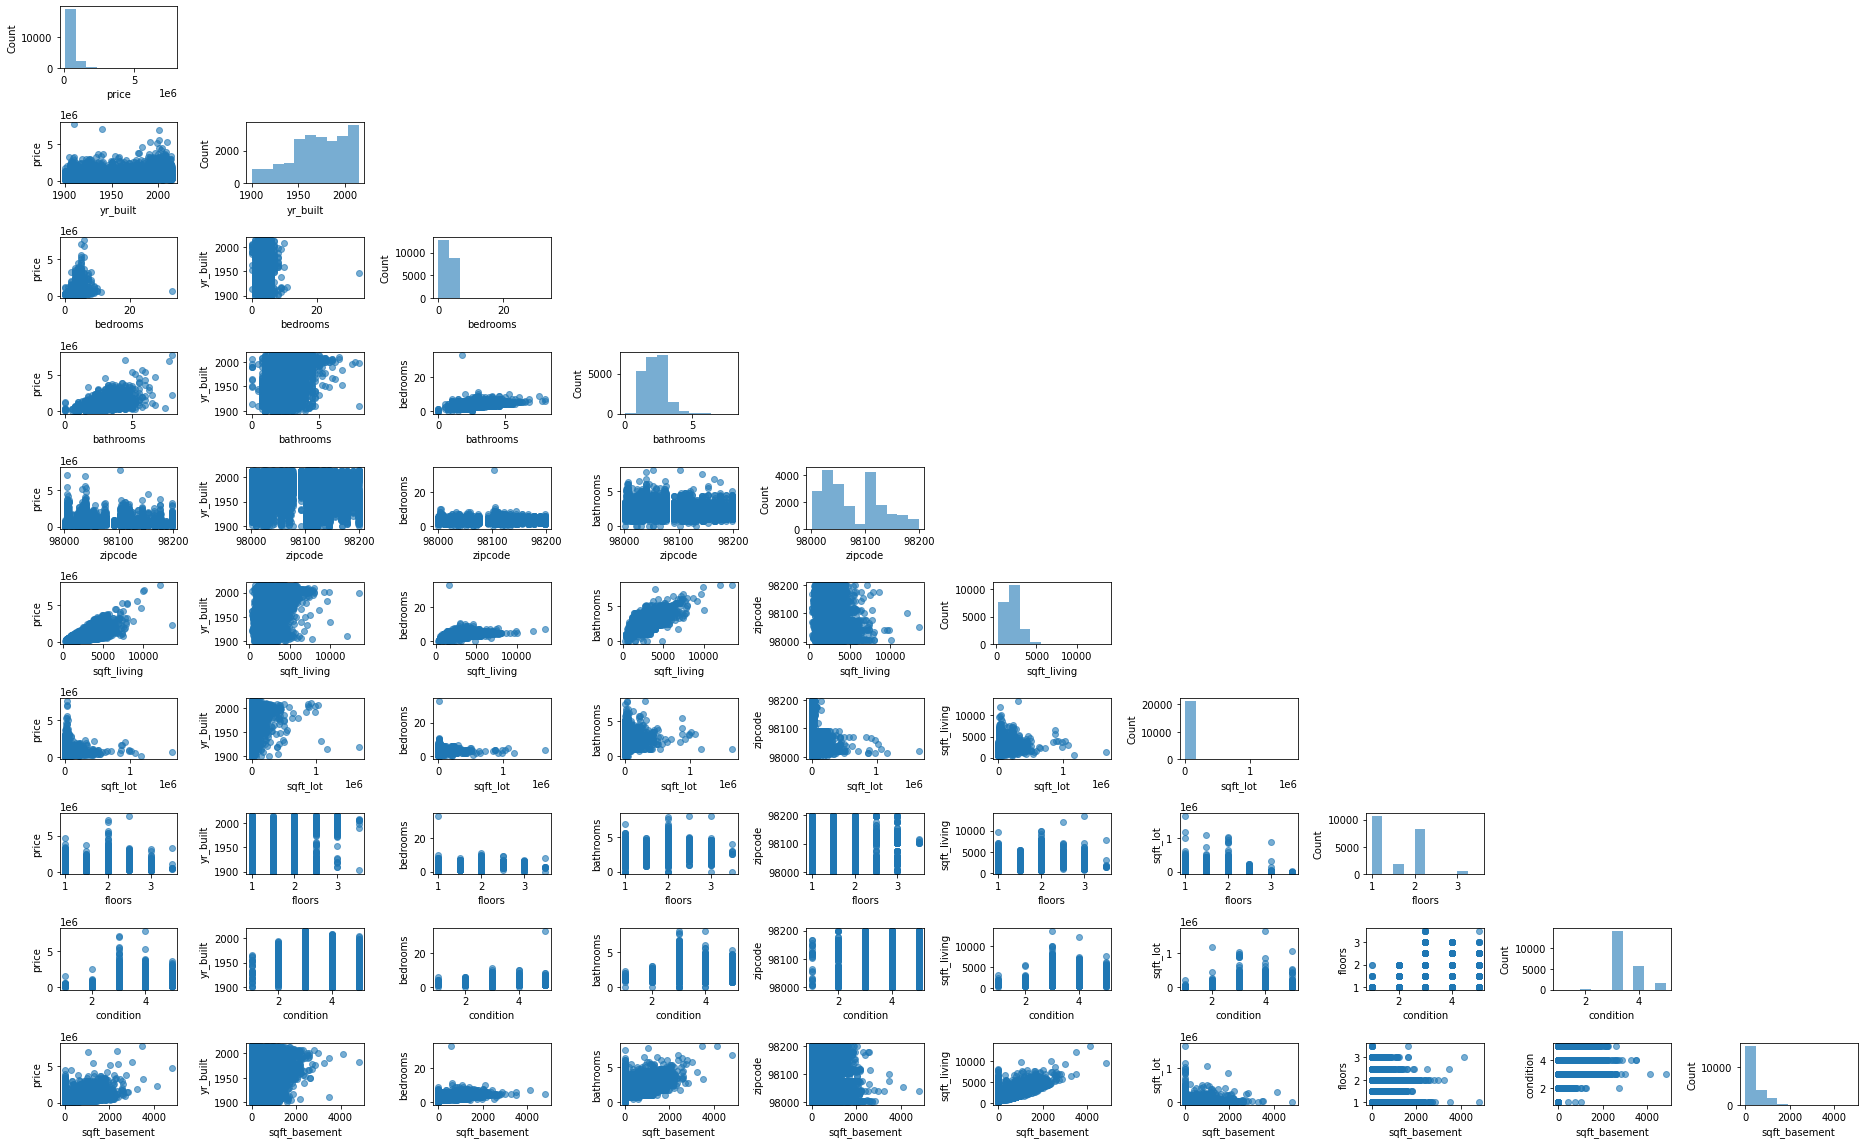

In [ ]:
from mlxtend.plotting import scatterplotmatrix
cols = ['price', 'yr_built', 'bedrooms', 'bathrooms', 'zipcode', 'sqft_living', 'sqft_lot', 'floors', 'condition', 'sqft_basement']

scatterplotmatrix(df[cols].values, figsize = (26,16), names = cols, alpha = 0.6)
plt.tight_layout()
plt.show()

From the scatter plot matrix, the following conclusions can be made:
- The number of bathrooms determines the price of the house
- Most houses with 2 floors are more pricey 
- The bigger the area of the living room, the pricey the house
- Zipcode of the house does not affect the house pricing 


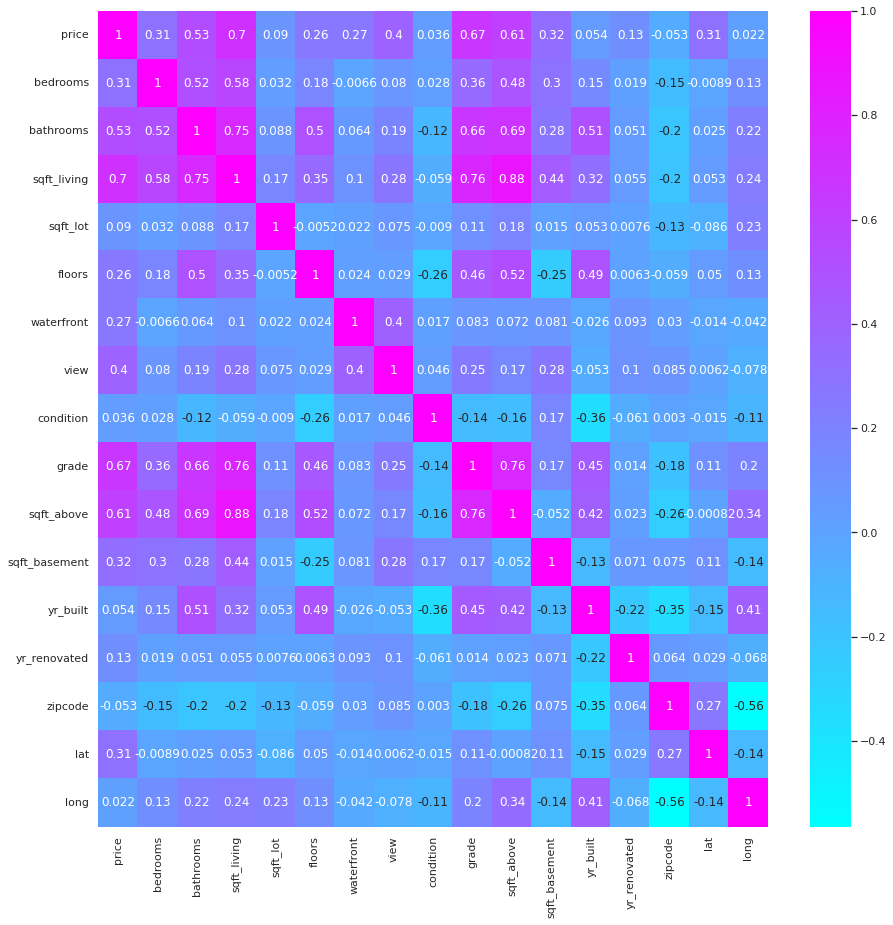

In [ ]:
# Correlation matrix heatmap

sns.set(rc={'figure.figsize':(15, 15)})
df_plot = sns.heatmap(df.corr(), cmap="cool", annot=True)
plt.show()

## 7. Implementing the Solution

####Multiple Linear Regression 

In [ ]:
# check for multicollinearity
cor = df[['bedrooms','bathrooms','sqft_living','sqft_lot','floors', 'waterfront', 'view', 'condition','grade','sqft_above','sqft_basement','yr_built', 'yr_renovated', 'zipcode']].corr()
cor

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
bedrooms,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668
bathrooms,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866
sqft_living,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430
sqft_lot,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574
floors,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121
waterfront,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285
view,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827
condition,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026
grade,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862
sqft_above,0.477600,0.685342,0.876597,0.183512,0.523885,0.072075,0.167649,-0.158214,0.755923,1.000000,-0.051943,0.423898,0.023285,-0.261190


In [ ]:
# using VIF
vif = pd.DataFrame(np.linalg.inv(cor),index=cor.index,columns=cor.columns)
vif

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
bedrooms,1.645605,-0.464574,-4.432250e-02,0.107607,0.045587,0.062307,0.112344,-0.053342,0.324132,-8.304466e-01,-4.704528e-01,0.130298,0.043964,0.078094
bathrooms,-0.464574,3.341376,-9.581134e-02,0.033555,-0.697873,0.007750,-0.028796,-0.136502,-0.262782,-1.085862e+00,-1.011342e+00,-0.908619,-0.259041,-0.002570
sqft_living,-0.029593,-0.099396,-1.486117e+14,0.113794,1.972767,-0.014427,0.040354,0.082488,0.503142,1.339923e+14,7.161248e+13,-0.206912,-0.109647,-0.570802
sqft_lot,0.107607,0.033555,1.126960e-01,1.068708,0.120602,0.016801,-0.057716,0.005525,0.076578,-4.566375e-01,-1.084298e-01,-0.008173,-0.004814,0.095854
floors,0.045587,-0.697873,1.989420e+00,0.120602,1.950337,-0.012093,-0.003411,0.089844,-0.213420,-2.067961e+00,-3.132919e-01,-0.404019,-0.079579,-0.300367
waterfront,0.062307,0.007750,-1.511940e-02,0.016801,-0.012093,1.201883,-0.488638,-0.015035,0.064912,-6.295808e-02,1.112607e-02,-0.016866,-0.067091,0.007709
view,0.112344,-0.028796,3.962304e-02,-0.057716,-0.003411,-0.488638,1.388414,-0.019701,-0.257267,-1.694204e-01,-3.216878e-01,0.141915,-0.033202,-0.107082
condition,-0.053342,-0.136502,8.123485e-02,0.005525,0.089844,-0.015035,-0.019701,1.243474,-0.011386,1.216293e-02,-1.206898e-01,0.543150,0.201282,0.170315
grade,0.324132,-0.262782,5.016141e-01,0.076578,-0.213420,0.064912,-0.257267,-0.011386,2.990435,-2.407202e+00,-9.119017e-01,-0.450783,-0.019920,-0.050255
sqft_above,-0.821788,-1.102690,1.339923e+14,-0.459058,-2.060998,-0.064038,-0.167143,0.011631,-2.410833,-1.208111e+14,-6.456774e+13,0.564981,0.129319,0.802090


There is no variable with a VIF score of 5 or nearing 5 so I won't be dropping any.

In [ ]:
# Splitting the dataset into attributes and labels
X = df.drop(['price', 'lat', 'long'], axis = 1)
y = df['price']

In [ ]:
# Standardizing the features
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
# Dividing the data into training and test sets
folds = KFold(n_splits=5)
print(str(folds.get_n_splits(X)) + ' folds are in use') 

for train_index, test_index in folds.split(X):
  # with 5 folds, the train set gets 80% of the data
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]



5 folds are in use


In [ ]:
# Fitting the train and test sets
regressor = LinearRegression()
regressor.fit(X_train, y_train) 

LinearRegression()

In [ ]:
# Finding the most optimal coefficients for all attributes
coeff_df = pd.DataFrame(regressor.coef_, index=['bedrooms',	'bathrooms', 'sqft_living', 'sqft_lot',	'floors',	'waterfront',	'view',	
                                                'condition',	'grade',	'sqft_above',	'sqft_basement',	'yr_built',	'yr_renovated', 'zipcode'], 
                       columns = ['coefficients']).sort_values(by = 'coefficients', ascending = False)
coeff_df

,coefficients
sqft_living,1.908641e+18
grade,1.427067e+05
waterfront,5.014958e+04
view,3.560386e+04
bathrooms,3.555855e+04
condition,1.279741e+04
floors,4.580966e+03
yr_renovated,3.804672e+03
zipcode,-5.248722e+03
sqft_lot,-1.021951e+04


In [ ]:
# Making predictions and comparing with the actual
y_pred = regressor.predict(X_test)

# Comparing the actual output values for X_test with the predicted values
df_comp = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_comp.describe()

,Actual,Predicted
count,4.322000e+03,4.322000e+03
mean,5.675757e+05,5.299786e+05
std,3.708901e+05,2.983752e+05
min,8.300000e+04,-5.995026e+05
25%,3.450000e+05,3.256150e+05
50%,4.750000e+05,4.707367e+05
75%,6.700000e+05,6.701315e+05
max,3.800000e+06,2.263495e+06


In [ ]:
# Evaluating the algorithm 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('multiple regression score: ',regressor.score(X_test,y_test))

Mean Absolute Error: 147906.1018023627
Mean Squared Error: 50676539545.31342
Root Mean Squared Error: 225114.50318740777
multiple regression score:  0.6315173396351571


- The root mean squared error is less than 10% of the actual mean, the model did a good job.
- The accuracy of the model is 63%

In [ ]:
# residual
residuals = np.subtract(y_pred, y_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()


,price
count,4.322000e+03
mean,-3.759712e+04
std,2.219784e+05
min,-2.164213e+06
25%,-1.334546e+05
50%,-2.382268e+04
75%,7.820340e+04
max,1.185655e+06


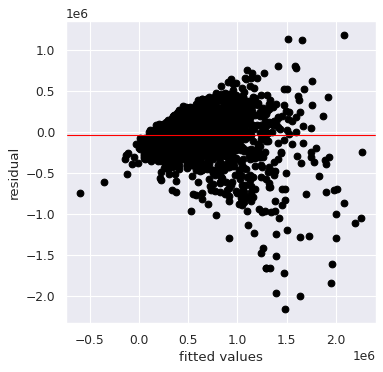

In [ ]:
# residual plot
from matplotlib.pyplot import figure
figure(figsize=(5, 5), dpi=80)
plt.scatter(y_pred, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

# The residuals are centered around the mean 0

In [ ]:
# Barlett's test to be thorough

import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# computing critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous')

# the variances are homogeneous

the variances are homogeneous


The results from the residualplot and Barlett's test show that the difference between the actual and predicted values are the same throughout the data 

## 8. Challenging the solution

####Quantile Regression 

In [ ]:
for i, colval in enumerate(df.drop(['price', 'lat','long'],1)):
  X = np.array(df[colval].values.reshape(-1,1))
  y = np.array(df['price'])


import statsmodels.formula.api as smf
mod = smf.quantreg('y ~ X ', df)
res = mod.fit()

# Models for other quantiles
quantiles = np.arange(0.1, 1.0, 0.1) 
models = []
param = []

for qt in quantiles:
  res = mod.fit(q = qt )
  models.append(res)
  param.append([qt, res.params['Intercept'], res.params['X']] + res.conf_int().loc['X'].tolist())
        
# Lastly we make a dataframe of the same name, so we we can view our different models.
param = pd.DataFrame(data = param, columns = ['quantile', 'intercept', 'x_coef', 'cf_lower_bound', 'cf_upper_bound'])
param

,quantile,intercept,x_coef,cf_lower_bound,cf_upper_bound
0,0.1,0.000026,2.499923,2.476364,2.523483
1,0.2,0.000031,3.040757,3.013517,3.067996
2,0.3,0.000036,3.519187,3.488600,3.549774
3,0.4,0.000042,4.072095,4.035998,4.108192
4,0.5,0.000047,4.590243,4.551679,4.628806
5,0.6,0.000054,5.287541,5.240527,5.334555
6,0.7,0.000062,6.064066,6.007626,6.120506
7,0.8,0.000073,7.142494,7.069925,7.215063
8,0.9,0.000092,9.040808,8.920801,9.160815


<Figure size 400x400 with 0 Axes>

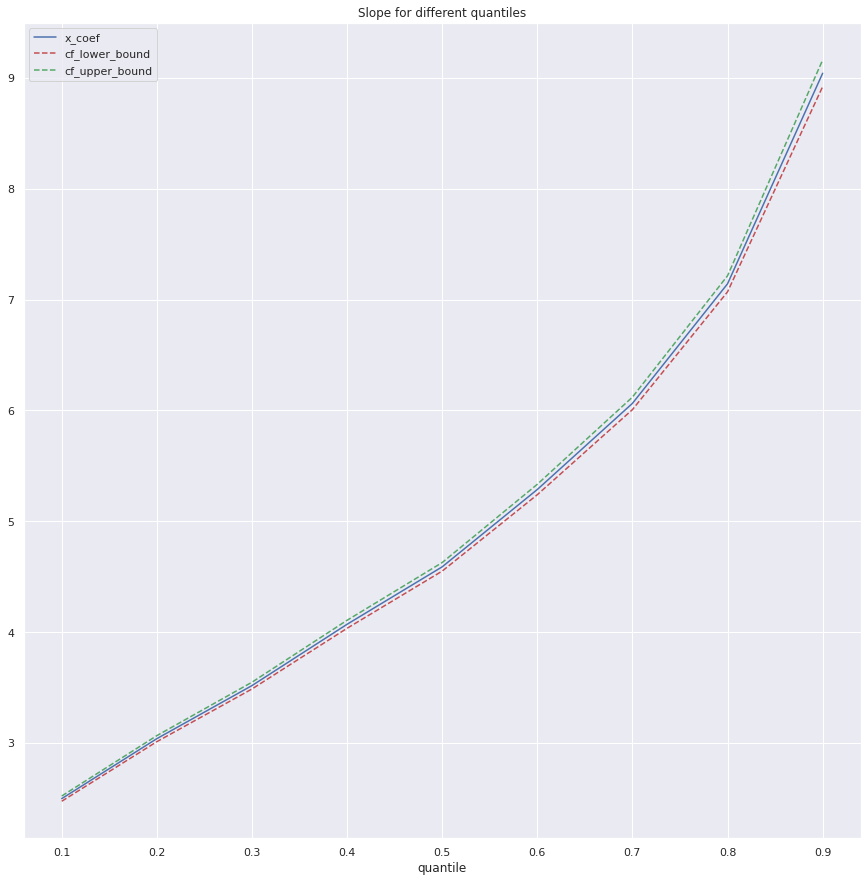

In [ ]:
# Plot the changes in the quantile coeffiecients

figure(figsize=(5, 5), dpi=80)
param.plot(x = 'quantile', y = ['x_coef','cf_lower_bound', 'cf_upper_bound'], 
	title = 'Slope for different quantiles', kind ='line', style = ['b-','r--','g--'])
plt.show()

####Ridge Regression 

In [ ]:
# Splitting the dataset into attributes and labels
X = df.drop(['price', 'lat', 'long'], axis = 1)
y = df['price']

In [ ]:
# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 0)

In [ ]:
# Standardizing

sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
# searching for the appropriate value for the L2 regularization 
ridge =  Ridge()
mod = GridSearchCV(estimator=ridge, param_grid={'alpha':np.logspace(-4,4,8)}, scoring='neg_mean_squared_error', n_jobs=1, refit=True, cv=15)


In [ ]:
# Fitting the model using the .fit function to run the model then use the .best_params_ and
#  .best_scores_ function to determine the models strength. 
mod.fit(X_train,y_train)
print('Best parameter: ',mod.best_params_)

{'alpha': 3.727593720314938}
print('Best score: ', abs(mod.best_score_)) 


# The best_score_ tells us what the best possible mean squared error is.
# This case, it is better than the linear regression model

Best parameter:  {'alpha': 3.727593720314938}
Best score:  48489115878.97925


In [ ]:
# confirming by fitting our model with the ridge information
from sklearn.metrics import mean_squared_error

ridge = Ridge(alpha = 3.727593720314938)
ridge.fit(X_train,y_train)
model = (mean_squared_error(y_true = y, y_pred = ridge.predict(X)))
print('Mean squared error: ', model)
print('Root mean squared error: ', np.sqrt(model))
print('The Ridge score is: ', ridge.score(X_test,y_test))


Mean squared error:  29793841928648.168
Root mean squared error:  5458373.560745744
The Ridge score is:  0.6454201055696258


- With cross-validation, we get a much better MSE value compared to the linear regression one.
- The RMSE is 5458373
- The model's accuracy is 64%

In [ ]:
# looking at coefficients

coeff_df = pd.DataFrame(ridge.coef_, index=['bedrooms',	'bathrooms', 'sqft_living', 'sqft_lot',	'floors',	'waterfront',	'view',	
                                            'condition',	'grade',	'sqft_above',	'sqft_basement',	'yr_built',	'yr_renovated', 'zipcode'], 
                       columns = ['coefficients']).sort_values(by = 'coefficients', ascending = False)
coeff_df

,coefficients
waterfront,577100.522546
grade,122535.475405
view,46401.054042
bathrooms,43568.512807
floors,26462.490221
condition,18698.648899
sqft_living,116.820717
sqft_basement,59.118003
sqft_above,57.702285
yr_renovated,8.685189


####Lasso Regression 

In [ ]:
# Splitting the dataset into attributes and labels
X = df.drop(['price', 'lat', 'long'], axis = 1)
y = df['price']

In [ ]:
# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 0)

In [ ]:
# Standardizing

sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
# Use GridSearch to get the best parameter  
lasso = Lasso()

parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}
lasso_search = GridSearchCV(lasso, param_grid=parameters, scoring='neg_root_mean_squared_error', n_jobs =1,refit=True, cv = 10)

In [ ]:
# Fitting models and print the best parameters
lasso_search.fit(X_train, y_train)
print('Best parameter: ',lasso_search.best_params_)


Best parameter:  {'alpha': 24.0}


In [ ]:
{'alpha': 24}
print('Best score (RMSE): ', abs(lasso_search.best_score_)) 

Best score (RMSE):  219391.66541929607


In [ ]:
# confirming by fitting our model with the lasso information
lasso = Lasso(alpha = 24)
lasso.fit(X_train,y_train)
model = (mean_squared_error(y_true = y, y_pred = lasso.predict(X)))
print('Mean squared error: ', model)
print('Root mean squared error: ', np.sqrt(model))
print('The Lasso score is: ', lasso.score(X_test,y_test))

Mean squared error:  29574585476461.195
Root mean squared error:  5438252.060769268
The Lasso score is:  0.645265472910014


- Cross-validating lasso gets us a much better MSE value compared to the linear regression one.
- The RMSE is 5438252
- The model's accuracy is 64%

In [ ]:
# looking at coefficients
coeff_df = pd.DataFrame(lasso_search.best_estimator_.coef_, index=['bedrooms',	'bathrooms', 'sqft_living', 'sqft_lot',	'floors',	'waterfront',	'view',	
                                                                   'condition',	'grade',	'sqft_above',	'sqft_basement',	'yr_built',	'yr_renovated', 'zipcode'], 
                       columns = ['coefficients']).sort_values(by = 'coefficients', ascending = False)
coeff_df

,coefficients
waterfront,592367.489767
grade,122634.484172
view,45631.534787
bathrooms,43514.482133
floors,26332.969085
condition,18599.416017
sqft_living,311.154002
yr_renovated,8.515259
zipcode,2.555472
sqft_lot,-0.262774


####Elastic-Net Regression

In [ ]:
# Use GridSearch to get the best parameter 
elastic = ElasticNet()

elastic_search = GridSearchCV(elastic, param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]}, scoring='neg_root_mean_squared_error', n_jobs =1,refit=True, cv = 20)

In [ ]:
# Fitting the model to find the best parameter 
elastic_search.fit(X_train,y_train)
print('Best parameter: ', elastic_search.best_params_)

Best parameter:  {'alpha': 0.0001, 'l1_ratio': 0.2}


In [ ]:
# Best Score
{'alpha': 0.0001}
print('Best score (RMSE): ', abs(elastic_search.best_score_)) 

Best score (RMSE):  218726.63382952116


In [ ]:
# Fitting the model using the recommended values 
elastic = ElasticNet(alpha=0.0001, l1_ratio=0.2)
elastic.fit(X_train,y_train)

model = (mean_squared_error(y_true = y, y_pred = elastic.predict(X)))
print('Mean squared error: ', model)
print('Root mean squared error: ', np.sqrt(model))
print('The ElasticNet score is: ', elastic.score(X_test,y_test))

Mean squared error:  29832714374292.895
Root mean squared error:  5461933.2085162755
The ElasticNet score is:  0.645308040556275


- The mean squared error is better compared to the linear regression one.
- RMSE is 5461933
- The score is 64%

In [ ]:
# looking at the coefficients 
coeff_df = pd.DataFrame(elastic_search.best_estimator_.coef_, index=['bedrooms',	'bathrooms', 'sqft_living', 'sqft_lot',	'floors',	'waterfront',	'view',	
                                                                   'condition',	'grade',	'sqft_above',	'sqft_basement',	'yr_built',	'yr_renovated', 'zipcode'], 
                       columns = ['coefficients']).sort_values(by = 'coefficients', ascending = False)
coeff_df

,coefficients
grade,141118.597784
sqft_living,80364.168402
sqft_above,67690.841607
waterfront,48896.495123
sqft_basement,40113.816897
view,35892.209440
bathrooms,35728.645931
floors,14247.430441
condition,12308.275812
yr_renovated,4052.852518


## 9. Score Analysis and Conclusion

The models have the following scores:
- Multiple linear regression: 0.6315173396351571 (63.15%)
- Ridge regression: 0.6454201055696258 (64.54%)
- Lasso regression: 0.645265472910014 (64.52%)
- Elastic-Net regression: 0.645308040556275 (64.53%)

L1, L2 and elastic-net regularization techniques performed almost same. Elastic-net works best with large datasets, that's why the accuracy is not so good. The other regression techniques accuracy are not so far from the baseline technique, linear regression. 